In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [207]:
train = pd.read_csv('titanic_train.csv')
test = pd.read_csv('titanic_test.csv')

In [208]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [209]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [210]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: >

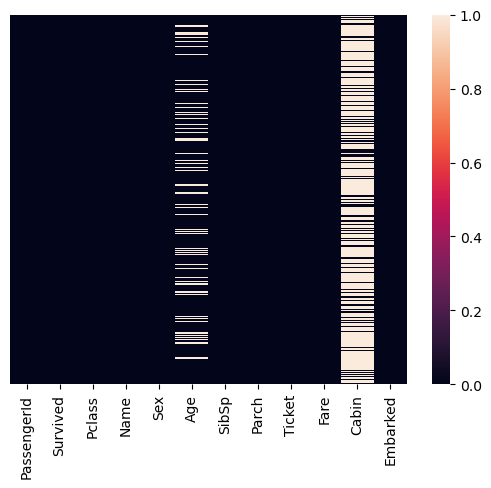

In [211]:
sns.heatmap(train.isnull(), yticklabels = False)

<Axes: >

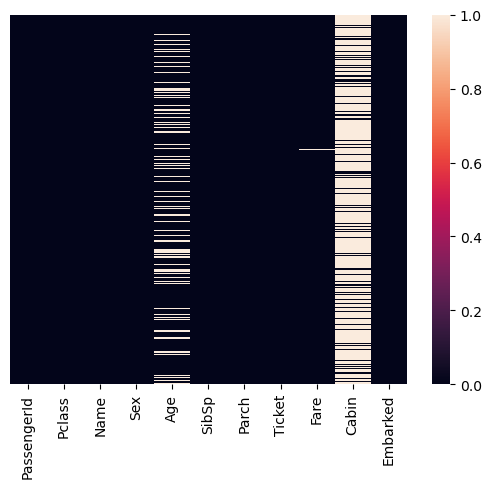

In [212]:
sns.heatmap(test.isnull(), yticklabels = False)

In [213]:
train = train.drop('Cabin', axis = 1)
test = test.drop('Cabin', axis = 1)

In [214]:
print('Train Class 1 mean Age: ',train[train['Pclass'] == 1]['Age'].mean())
print('Train Class 2 mean Age: ',train[train['Pclass'] == 2]['Age'].mean())
print('Train Class 3 mean Age: ',train[train['Pclass'] == 3]['Age'].mean())

Train Class 1 mean Age:  38.233440860215055
Train Class 2 mean Age:  29.87763005780347
Train Class 3 mean Age:  25.14061971830986


In [215]:
print('Test Class 1 mean Age: ',test[test['Pclass'] == 1]['Age'].mean())
print('Test Class 2 mean Age: ',test[test['Pclass'] == 2]['Age'].mean())
print('Test Class 3 mean Age: ',test[test['Pclass'] == 3]['Age'].mean())

Test Class 1 mean Age:  40.91836734693877
Test Class 2 mean Age:  28.7775
Test Class 3 mean Age:  24.02794520547945


In [216]:
def impute_age_train(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
            
        if Pclass == 1:
            return 38
        elif Pclass == 2:
                return 30
        else:
            return 25
            
    else:
        return Age
        
def impute_age_test(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
            
        if Pclass == 1:
            return 41
        elif Pclass == 2:
            return 29
        else:
            return 24
            
    else:
        return Age
            

In [217]:
train['Age'] = train[['Age','Pclass']].apply(impute_age_train, axis = 1)
test['Age'] = test[['Age','Pclass']].apply(impute_age_test, axis = 1)

In [218]:
train.dropna(axis = 0, inplace = True)

In [219]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


<Axes: >

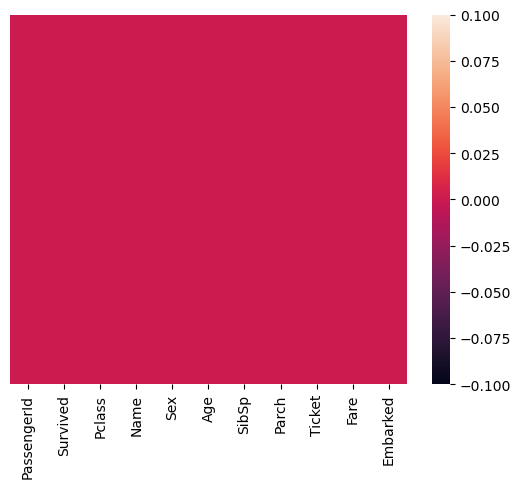

In [220]:
sns.heatmap(train.isnull(), yticklabels = False)

In [221]:
test[test['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,S


In [222]:
test[test['Pclass'] == 3]['Fare'].mean()

12.459677880184334

In [223]:
test['Fare'].fillna(value = test[test['Pclass'] == 3]['Fare'].mean(), inplace = True)

In [224]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


<Axes: >

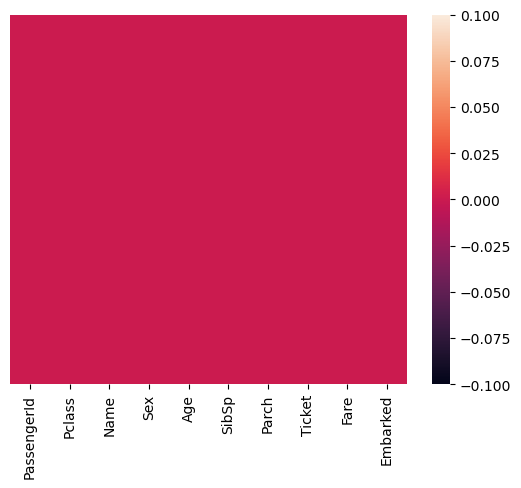

In [225]:
sns.heatmap(test.isnull(), yticklabels = False)

In [226]:
train['Sex'] = train['Sex'].map({'male' : 1, 'female' : 0})
test['Sex'] = test['Sex'].map({'male' : 1, 'female' : 0})

In [227]:
train = train.rename(columns = {'Sex' : 'male'})

In [228]:
test = test.rename(columns = {'Sex' : 'male'})

In [229]:
embarked_train = pd.get_dummies(data = train['Embarked'], drop_first = True)
embarked_train.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [230]:
embarked_test = pd.get_dummies(data = test['Embarked'], drop_first = True)
embarked_test.head()

,Q,S
0,1,0
1,0,1
2,1,0
3,0,1
4,0,1


In [231]:
train = pd.concat([train, embarked_train], axis = 1)
test = pd.concat([test, embarked_test], axis = 1)

In [232]:
train.head()

,PassengerId,Survived,Pclass,Name,male,Age,SibSp,Parch,Ticket,Fare,Embarked,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S,0,1


In [233]:
test.head()

,PassengerId,Pclass,Name,male,Age,SibSp,Parch,Ticket,Fare,Embarked,Q,S
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,Q,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,S,0,1
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,Q,1,0
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,S,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,S,0,1


In [236]:
train_lm = train.drop(['PassengerId','Name', 'Ticket', 'Embarked'], axis = 1)
test_lm = test.drop(['PassengerId','Name', 'Ticket', 'Embarked'], axis = 1)

In [237]:
train_lm.head()

,Survived,Pclass,male,Age,SibSp,Parch,Fare,Q,S
0,0,3,1,22.0,1,0,7.2500,0,1
1,1,1,0,38.0,1,0,71.2833,0,0
2,1,3,0,26.0,0,0,7.9250,0,1
3,1,1,0,35.0,1,0,53.1000,0,1
4,0,3,1,35.0,0,0,8.0500,0,1


In [239]:
test_lm.head()

,Pclass,male,Age,SibSp,Parch,Fare,Q,S
0,3,1,34.5,0,0,7.8292,1,0
1,3,0,47.0,1,0,7.0000,0,1
2,2,1,62.0,0,0,9.6875,1,0
3,3,1,27.0,0,0,8.6625,0,1
4,3,0,22.0,1,1,12.2875,0,1


In [240]:
train_lm.columns

Index(['Survived', 'Pclass', 'male', 'Age', 'SibSp', 'Parch', 'Fare', 'Q',
       'S'],
      dtype='object')

In [241]:
X_train = train_lm[['Pclass', 'male', 'Age', 'SibSp', 'Parch', 'Fare', 'Q', 'S']]
y_train = train_lm['Survived']
X_test = test_lm[['Pclass', 'male', 'Age', 'SibSp', 'Parch', 'Fare', 'Q', 'S']]

In [244]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [246]:
lm = LogisticRegression(solver='lbfgs', max_iter=500)
lm.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [253]:
prediction = lm.predict(X_test)
prediction

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,

In [258]:
test['Survived'] = prediction

In [260]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'male', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked', 'Q', 'S', 'Survived'],
      dtype='object')

In [262]:
test = test[['PassengerId', 'Survived', 'Pclass', 'Name', 'male', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked', 'Q', 'S']]
test.head()

,PassengerId,Survived,Pclass,Name,male,Age,SibSp,Parch,Ticket,Fare,Embarked,Q,S
0,892,0,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,Q,1,0
1,893,0,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,S,0,1
2,894,0,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,Q,1,0
3,895,0,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,S,0,1
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,S,0,1


In [265]:
test['Survived'] = test['Survived'].map({0 : 'Died', 1 : 'Survived'})

Text(0.5, 0, 'State')

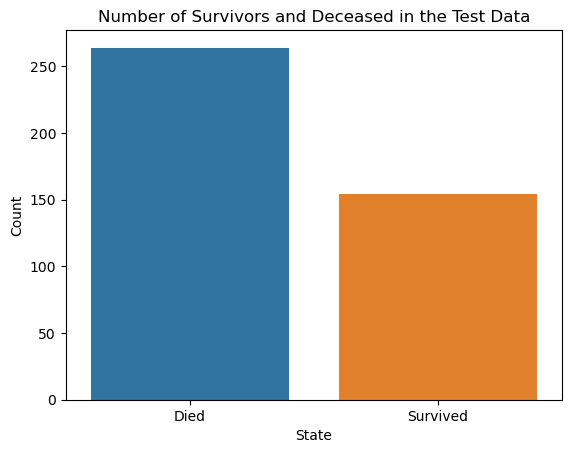

In [270]:
ax = sns.countplot(x = 'Survived', data = test)
ax.set_title('Number of Survivors and Deceased in the Test Data')
ax.set_ylabel('Count')
ax.set_xlabel('State')